<a href="https://colab.research.google.com/github/Renata-Thomazelli/mentoria2021/blob/main/rainfall_analise_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>**Analyzing Rainfall**
**Analyzing Rainfall**<font>

---


Importing the Data
---

In [1]:
# Importing Drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing the packages 
import pandas as pd
import numpy as np
import chardet
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

**Reading CSV**

In [3]:
file_path ='/content/drive/MyDrive/Data_Lake/temperatura_preciptacao/'
tipo = 'pr_'
anos ='1901_2020_'
pais = "USA"

file = f"{tipo}{anos}{pais}.csv"

In [4]:
with open(f"{file_path}{file}", 'rb') as encoding:
    r_encoding = chardet.detect(encoding.read(100000))
r_encoding

{'confidence': 1.0, 'encoding': 'ascii', 'language': ''}

In [5]:
arquivo = f"{tipo}{pais}"
with open (f"{file_path}{file}",'r',encoding=r_encoding['encoding']) as arquivo :
  df_pr = pd.read_csv(arquivo)

 
**DataFrame**

In [6]:
df_pr

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,39.7,1901,Jan Average,United States,USA
1,41.4,1901,Feb Average,United States,USA
2,46.6,1901,Mar Average,United States,USA
3,50.1,1901,Apr Average,United States,USA
4,53.7,1901,May Average,United States,USA
...,...,...,...,...,...
1435,59.4,2020,Aug Average,United States,USA
1436,53.2,2020,Sep Average,United States,USA
1437,51.6,2020,Oct Average,United States,USA
1438,47.5,2020,Nov Average,United States,USA


In [7]:
#Dataframe size
df_pr.shape

(1440, 5)

In [8]:
#Dataframe informations
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rainfall - (MM)  1440 non-null   float64
 1    Year            1440 non-null   int64  
 2    Statistics      1440 non-null   object 
 3    Country         1440 non-null   object 
 4    ISO3            1440 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 56.4+ KB


In [9]:
#identifying coluns's names
df_pr.columns

Index(['Rainfall - (MM)', ' Year', ' Statistics', ' Country', ' ISO3'], dtype='object')

In [10]:
#cleaning columns names
colunas = [c.strip().lower().replace(" ","_") for c in df_pr.columns]
df_pr.columns = colunas
   

df_pr.head(5)

,rainfall_-_(mm),year,statistics,country,iso3
0,39.7,1901,Jan Average,United States,USA
1,41.4,1901,Feb Average,United States,USA
2,46.6,1901,Mar Average,United States,USA
3,50.1,1901,Apr Average,United States,USA
4,53.7,1901,May Average,United States,USA


In [11]:
#checking columns' names after modifications
df_pr.columns

Index(['rainfall_-_(mm)', 'year', 'statistics', 'country', 'iso3'], dtype='object')

In [12]:
#defining a function to replace values inside the index column 
def replace (col): 
    return col.replace(" Average",'').strip()

In [13]:
 #creating a dict to redefining some columns' names
 renomeando = {'rainfall_-_(mm)':'rainfall_mm','statistics':'month'}

In [14]:
#defining a function to create a conditional new column
def year_season(row):
    seasons = {"spring":["Mar","Apr","May"], 'summer':["Jun","Jul","Aug"],'autumn':['Sep',"Oct","Nov"],'winter':["Dec","Jan","Feb"]}
    key_list = list(seasons.keys())
    val_list = list(seasons.values())
    for meses in seasons.values():
        for m in meses:
            if m == row['month']:
                indice =val_list.index(meses)
                #print(indice,meses)
                #print(key_list[indice])
                return key_list[indice]

In [15]:
#Filtering years from 1960 onwards, cleaning and renaming columns
df_pr_test_season=\
(
    df_pr.loc[df_pr['year']>=1960,:]
    .rename(columns=renomeando)
    .set_index("month")
    .rename(index=replace)
    .reset_index()
    
    
)

df_pr_test_season.loc[::,['country','iso3']]=df_pr_test_season.loc[::,['country','iso3']].applymap(lambda x: x.strip())

df_pr_test_season.head()

,month,rainfall_mm,year,country,iso3
0,Jan,47.7,1960,United States,USA
1,Feb,50.3,1960,United States,USA
2,Mar,40.4,1960,United States,USA
3,Apr,42.9,1960,United States,USA
4,May,59.1,1960,United States,USA


In [16]:
df_pr_test_season.iloc[0,3]

'United States'

In [17]:
df_pr_test_season.loc[::,['country','iso3']].applymap(lambda x: x.strip())
df_pr_test_season.country.apply(lambda x: x.strip()).iloc[0]


'United States'

In [18]:
#Including the conditional column: season
df_pr_season =df_pr_test_season.assign(season = df_pr_test_season.apply(year_season,axis=1))



In [19]:
df_pr_season

,month,rainfall_mm,year,country,iso3,season
0,Jan,47.7,1960,United States,USA,winter
1,Feb,50.3,1960,United States,USA,winter
2,Mar,40.4,1960,United States,USA,spring
3,Apr,42.9,1960,United States,USA,spring
4,May,59.1,1960,United States,USA,spring
...,...,...,...,...,...,...
727,Aug,59.4,2020,United States,USA,summer
728,Sep,53.2,2020,United States,USA,autumn
729,Oct,51.6,2020,United States,USA,autumn
730,Nov,47.5,2020,United States,USA,autumn


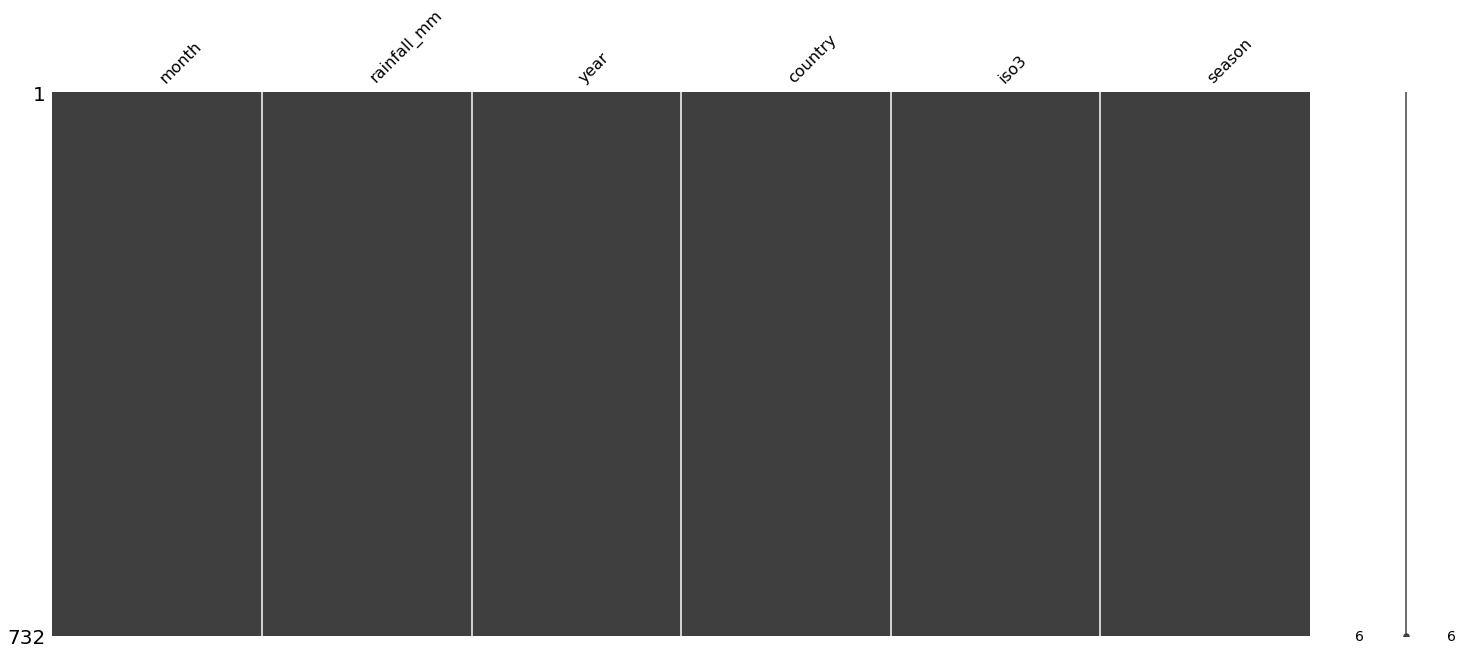

In [20]:
#Verifying NAN values
msno.matrix(df_pr_season)

In [21]:
df_pr_season.to_csv(f"/content/drive/MyDrive/Temperatura_Precipitacao_analises/limpos/pr_avg/{tipo}{anos}{pais}_seasons.csv", index=False)

**Improving the memory usage**

---

In [22]:
#Verifying the shape
df_pr_season.shape


(732, 6)

In [23]:
#Verifying types and memory usage
original_info = df_pr_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        732 non-null    object 
 1   rainfall_mm  732 non-null    float64
 2   year         732 non-null    int64  
 3   country      732 non-null    object 
 4   iso3         732 non-null    object 
 5   season       732 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 34.4+ KB


In [24]:
#Verifying memory usage
original_mem = df_pr_season.memory_usage(deep=True)


In [25]:
#Checking the low cardinality
df_pr_season.select_dtypes(include=["object"]).nunique()

month      12
country     1
iso3        1
season      4
dtype: int64

In [26]:
#Changing the columns types
col_to_category = ['month',"country","iso3","season"]

df_pr_season["year"]= df_pr_season["year"].astype("int32")
df_pr_season[col_to_category]=df_pr_season[col_to_category].astype("category")

df_pr_season

,month,rainfall_mm,year,country,iso3,season
0,Jan,47.7,1960,United States,USA,winter
1,Feb,50.3,1960,United States,USA,winter
2,Mar,40.4,1960,United States,USA,spring
3,Apr,42.9,1960,United States,USA,spring
4,May,59.1,1960,United States,USA,spring
...,...,...,...,...,...,...
727,Aug,59.4,2020,United States,USA,summer
728,Sep,53.2,2020,United States,USA,autumn
729,Oct,51.6,2020,United States,USA,autumn
730,Nov,47.5,2020,United States,USA,autumn


Comparing Memory Usage

In [27]:
#Verifying new memory usage
new_memory = df_pr_season.memory_usage(deep=True)


In [28]:
# Comparying memory usage
old_value ='\033[91m'
new_value ='\033[1;32m'
normal_value = '\033[0m'
print(old_value + "This is the original memory usage" + normal_value)
print(original_mem)
print(new_value + "\nAnd this is the new memory usage" + normal_value)
print(new_memory)


This is the original memory usage
Index            128
month          43920
rainfall_mm     5856
year            5856
country        51240
iso3           43920
season         46116
dtype: int64

And this is the new memory usage
Index           128
month          1772
rainfall_mm    5856
year           2928
country         882
iso3            872
season         1144
dtype: int64


In [29]:
#Checking new info data
new_info = df_pr_season.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   month        732 non-null    category
 1   rainfall_mm  732 non-null    float64 
 2   year         732 non-null    int32   
 3   country      732 non-null    category
 4   iso3         732 non-null    category
 5   season       732 non-null    category
dtypes: category(4), float64(1), int32(1)
memory usage: 12.3 KB


In [30]:
#Checking the describe method
df_pr_season['rainfall_mm'].describe().T

count    732.000000
mean      55.378689
std       11.683750
min       25.300000
25%       47.075000
50%       55.700000
75%       64.100000
max       88.800000
Name: rainfall_mm, dtype: float64

*PLOTTING YEARS*

In [31]:
#Defining the df to chart
df_pr_season_chart =\
(
    df_pr_season.set_index("month")
)

df_pr_season_chart

,rainfall_mm,year,country,iso3,season
month,,,,,
Jan,47.7,1960,United States,USA,winter
Feb,50.3,1960,United States,USA,winter
Mar,40.4,1960,United States,USA,spring
Apr,42.9,1960,United States,USA,spring
May,59.1,1960,United States,USA,spring
...,...,...,...,...,...
Aug,59.4,2020,United States,USA,summer
Sep,53.2,2020,United States,USA,autumn
Oct,51.6,2020,United States,USA,autumn


In [32]:
#Importing the package and defining the colors to plot
import matplotlib.dates as mdt
blue = '#99ddee'
white = '#ffffff'

In [33]:
#Defining the plot's function
def plot_year(ax,temp,years):
    ax.set_facecolor(blue)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    filtro_1 = df_pr_season_chart.year == y
    ax.plot(df_pr_season_chart.index[filtro_1],df_pr_season_chart.loc[filtro_1,'rainfall_mm'].values)
    ax.tick_params(axis='x', colors=white)
    ax.tick_params(axis='y', colors=white)
    ax.set_ylabel('Rainfall (mm)', color=white)
    ax.set_title(f"Year {y}", color=white, fontweight='bold')
    ax.fill_between(df_pr_season_chart.index,min(df_pr_season_chart['rainfall_mm']), max(df_pr_season_chart['rainfall_mm'])+5,  facecolor='white' )


In [34]:
df_pr_season_chart_x = df_pr_season_chart.reset_index()

In [35]:
path_chart_pr = '/content/drive/MyDrive/Temperatura_Precipitacao_analises/charts/pr_avg/'

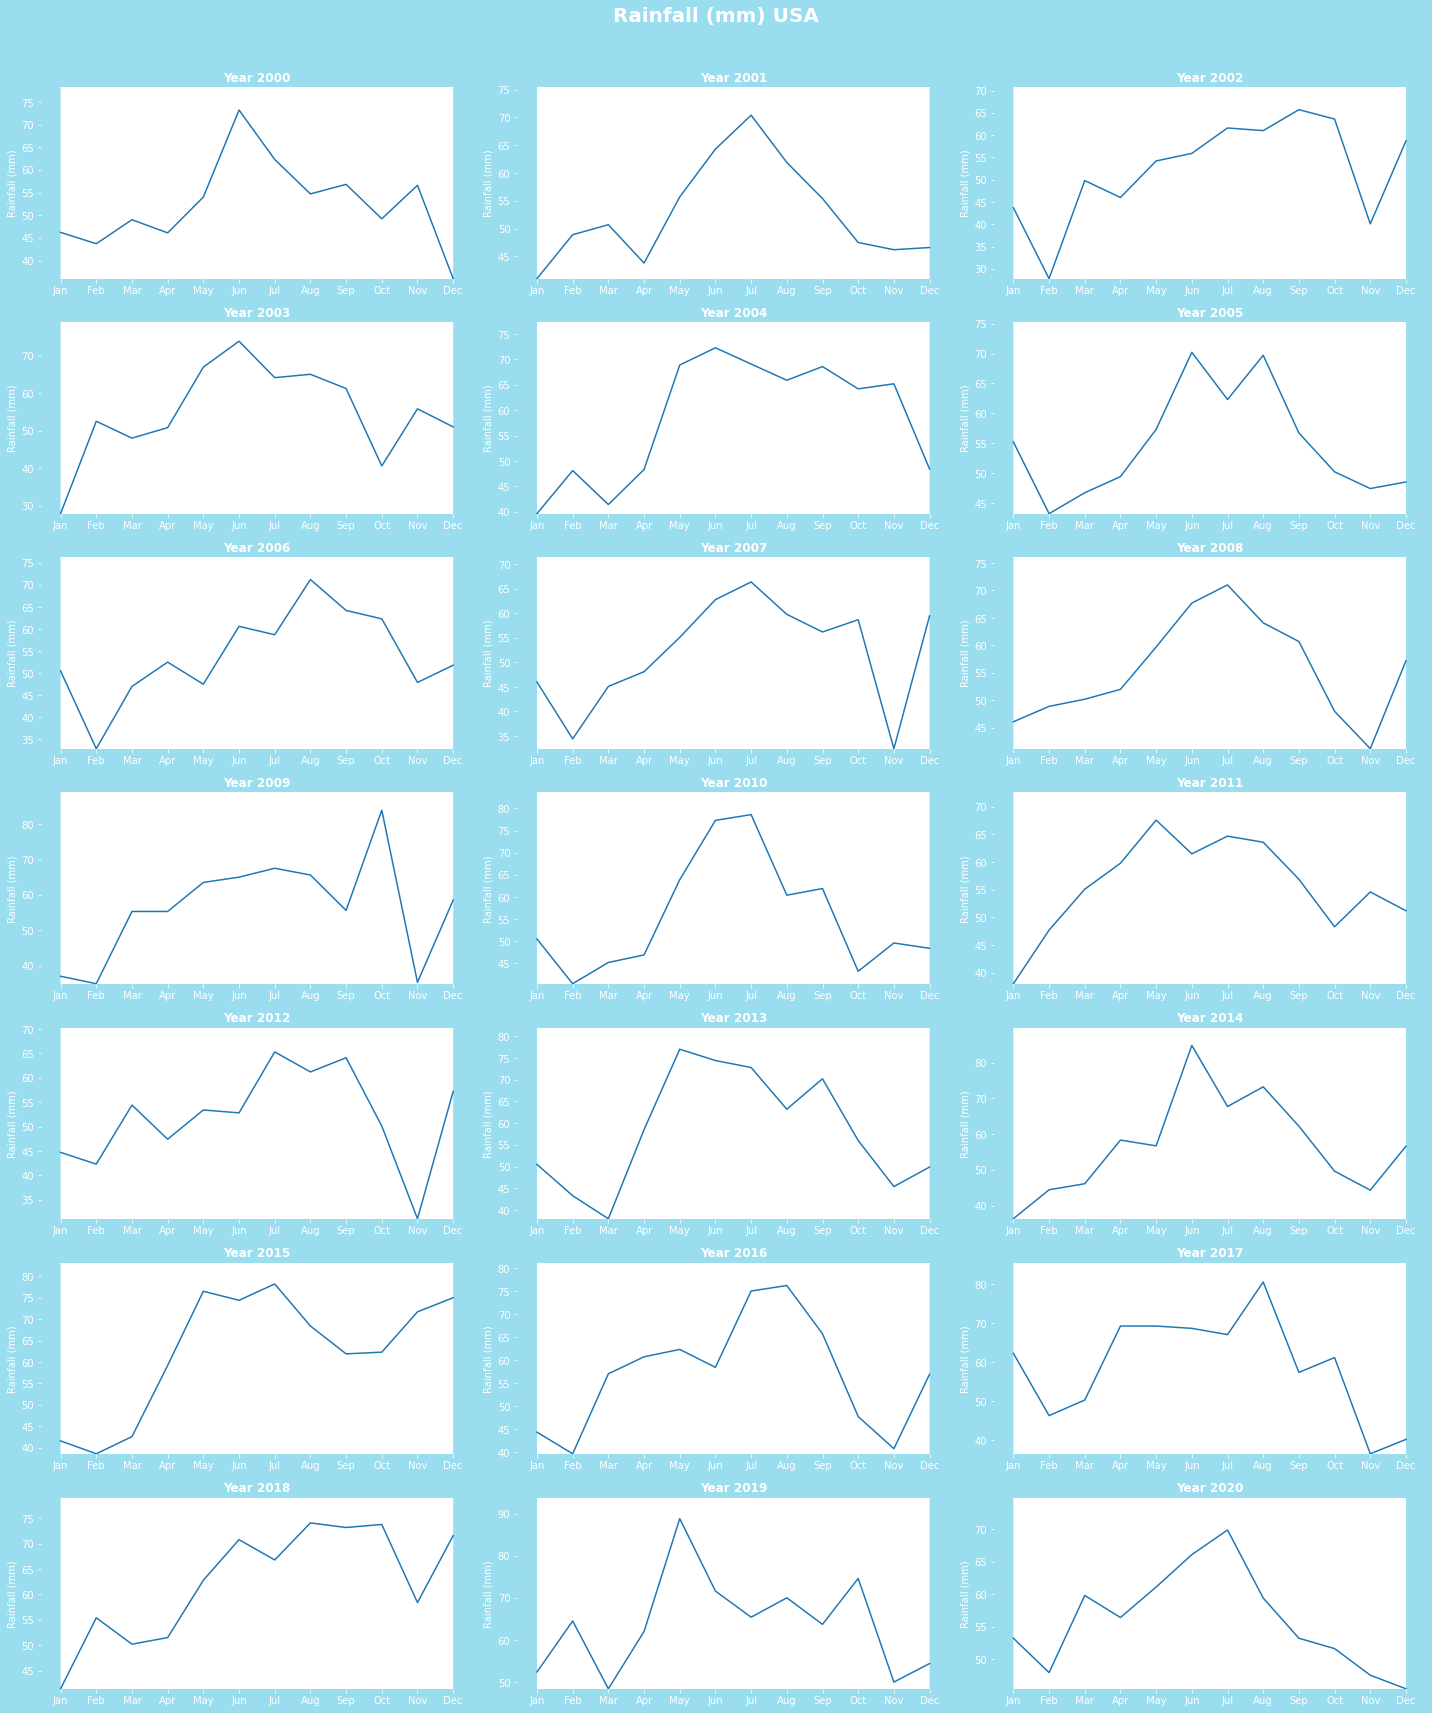

In [36]:
#Ploting the years
years = range(2000,2020+1)
fig, axs = plt.subplots(ncols =3, nrows = int(len(years)/3),figsize=(20,25), linewidth = 5, facecolor = blue)

axs = axs.flatten()
max_val = None
max_data = None
max_ax = None
for i, y in enumerate(years):

    ax= axs[i]
 
    data_1=\
    (
        df_pr_season_chart_x.assign(YEAR=pd.to_datetime(df_pr_season_chart_x.year))
        .set_index("year")
        .loc[y]
        .rainfall_mm
        .interpolate()  
    )
 

    if max_val is None or max_val < data_1.max():
        max_val = data_1.max()
        max_data = data_1
        max_ax = ax

    ax.set_ylim(min(data_1.values), max((data_1.values))+5)
    years = {y}
    plot_year(ax, data_1, years)


fig.suptitle(f'Rainfall (mm) {pais}', color='white', fontweight='bold',fontsize=20 )
fig.tight_layout( rect= [0,0.03, 1, 0.95])
fig.savefig(f'{path_chart_pr}Rainfall(mm) by Year {pais}.png', dpi=300, facecolor=blue)



*PLOTTING QUARTILES*

In [37]:
#Defining data to Seasons' Quartile
pr_season = ['rainfall_mm','season']
df_pr_season= df_pr_season[pr_season]


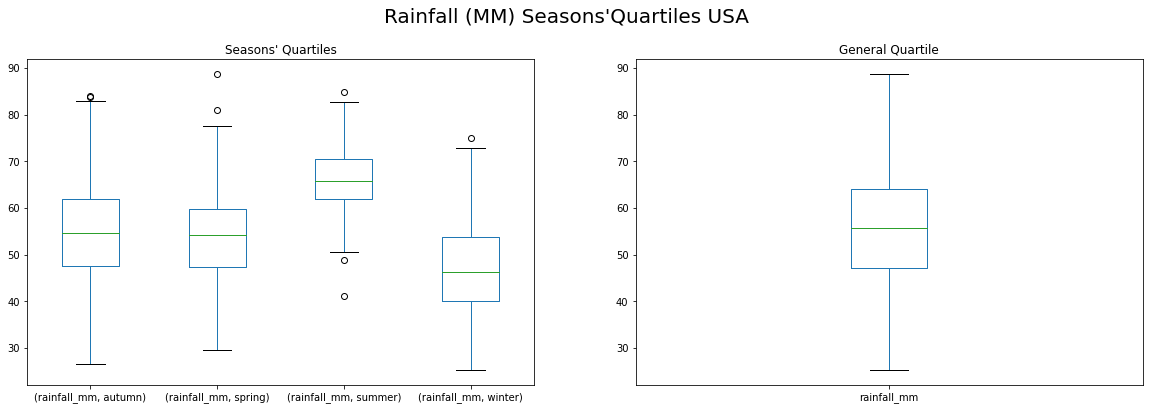

In [38]:
#Ploting Quartiles
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,6))
fig.suptitle(f"Rainfall (MM) Seasons'Quartiles {pais}", size=20, y=1.00)
df_pr_season.pivot(columns='season').plot.box(ax=ax1,title="Seasons' Quartiles")
df_pr_season['rainfall_mm'].plot.box(ax=ax2, title="General Quartile")
fig.savefig(f"{path_chart_pr}{pais} Rainfall (MM) Seasons'Quartiles")

In [39]:
country=df_pr_season_chart.iloc[0,2]


In [40]:
iso3=df_pr_season_chart.iloc[0,3]


In [41]:
iso3

'USA'

In [42]:
country

'United States'

In [43]:
#Defining data to General Quartile
general_quartile= df_pr_season['rainfall_mm'].describe()[['min','25%','50%','75%','max']].round(2).to_frame().assign(country=country).assign(iso3=iso3)
general_quartile.index.name='quartil'
general_quartile

,rainfall_mm,country,iso3
quartil,,,
min,25.30,United States,USA
25%,47.08,United States,USA
50%,55.70,United States,USA
75%,64.10,United States,USA
max,88.80,United States,USA


In [44]:
path_quartil_pr ='/content/drive/MyDrive/Temperatura_Precipitacao_analises/notebooks/Quartiles/PR_AVG/'

In [45]:
general_quartile.to_csv(f"{path_quartil_pr}{pais}_Rainfall(MM)_General_Quartile.csv")

In [46]:
seasons_quartiles=\
(
    df_pr_season.pivot(columns='season')
    .describe()
    .loc[['min','25%','50%','75%',"max"]]
    .round(2)
    
    
)

#quartil_temp_seasons.columns=quartil_temp_seasons.columns.droplevel()
seasons_quartiles

rainfall_mm                     
season      autumn spring summer winter
min          26.60  29.70   41.2   25.3
25%          47.50  47.45   61.9   40.1
50%          54.60  54.20   65.7   46.4
75%          61.85  59.80   70.5   53.8
max          83.90  88.80   84.8   75.0

In [47]:
seasons_quartiles.columns=\
(
    seasons_quartiles.columns.droplevel().add_categories(['country','iso3'])
       
)
seasons_quartiles=seasons_quartiles.assign(country=country).assign(iso3=iso3)
seasons_quartiles.index.name='quartil'
seasons_quartiles

season,autumn,spring,summer,winter,country,iso3
quartil,,,,,,
min,26.60,29.70,41.2,25.3,United States,USA
25%,47.50,47.45,61.9,40.1,United States,USA
50%,54.60,54.20,65.7,46.4,United States,USA
75%,61.85,59.80,70.5,53.8,United States,USA
max,83.90,88.80,84.8,75.0,United States,USA


In [48]:
seasons_quartiles.to_csv(f"{path_quartil_pr}{pais}_Rainfall(MM)_Seasons_Quartiles.csv")